In [102]:
import tensorflow as tf

In [103]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [104]:
import os
import numpy as np
import matplotlib.pyplot as plt


In [105]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)

In [106]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [107]:
train_cats_dir = os.path.join(train_dir, 'cats')  
train_dogs_dir = os.path.join(train_dir, 'dogs')  
validation_cats_dir = os.path.join(validation_dir, 'cats')  
validation_dogs_dir = os.path.join(validation_dir, 'dogs')  

In [108]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_tr + num_dogs_tr
total_val = num_cats_val + num_dogs_val

In [109]:
print('total training cat images:', num_cats_tr)
print('total training dog images:', num_dogs_tr)

print('total validation cat images:', num_cats_val)
print('total validation dog images:', num_dogs_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training cat images: 1000
total training dog images: 1000
total validation cat images: 500
total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


In [110]:
BATCH_SIZE = 100
IMG_SHAPE  = 150 # Our training data consists of images with width of 150 pixels and height of 150 pixels

DATA AUGMENTATION


In [111]:
#function to plot a grid of images
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

In [112]:
#horizontal flip
# image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

# train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
#                                                directory=train_dir,
#                                                shuffle=True,
#                                                target_size=(IMG_SHAPE,IMG_SHAPE))

In [113]:
#sample for seeing result of horizontal augmentation
# augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

In [114]:
#Rotating the images
# image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

# train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
#                                                directory=train_dir,
#                                                shuffle=True,
#                                                target_size=(IMG_SHAPE, IMG_SHAPE))

In [115]:
#sample for seeing the result for Rotational augmentation
# augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

In [116]:
#Zoom augmentation 
# Image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

# train_data_gen = Image_gen.flow_from_directory(batch_size=BATCH_SIZE,
#                                                directory=train_dir,
#                                                shuffle=True,
#                                                target_size=(IMG_SHAPE,IMG_SHAPE))

In [117]:
# augmented_images = [train_data_gen[0][0][0] for i in range(5)]
# plotImages(augmented_images)

In [118]:
# Original Image augmentation
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=train_dir,
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2000 images belonging to 2 classes.


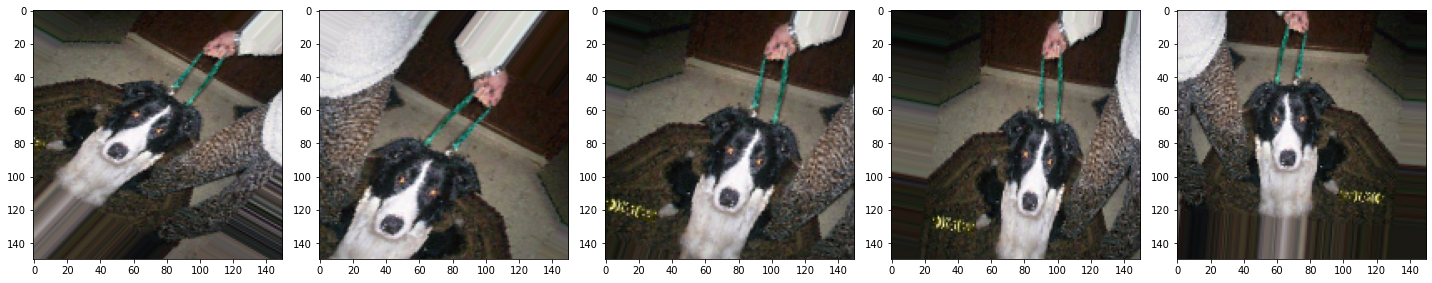

In [119]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [120]:
#Creating Validadtion Data generator

image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size = (IMG_SHAPE,IMG_SHAPE),
                                                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [121]:
#model of our Image Augmentation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

In [122]:
#Compiling our model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [123]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 128)      

In [124]:
# Model Training
epochs=100
history = model.fit_generator(
          train_data_gen,
          steps_per_epoch=int(np.ceil(total_train/float(BATCH_SIZE))),
          epochs = epochs,
          validation_data=val_data_gen,
          validation_steps=int(np.ceil(total_val/float(BATCH_SIZE)))
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
20/20 [==============================] - 16s 781ms/step - loss: 0.7214 - accuracy: 0.5015 - val_loss: 0.6949 - val_accuracy: 0.5000
Epoch 2/100
20/20 [==============================] - 16s 802ms/step - loss: 0.6900 - accuracy: 0.5225 - val_loss: 0.6879 - val_accuracy: 0.5680
Epoch 3/100
20/20 [==============================] - 16s 793ms/step - loss: 0.6911 - accuracy: 0.5230 - val_loss: 0.6812 - val_accuracy: 0.5810
Epoch 4/100
20/20 [==============================] - 16s 781ms/step - loss: 0.6853 - accuracy: 0.5630 - val_loss: 0.6819 - val_accuracy: 0.5300
Epoch 5/100
20/20 [==============================] - 16s 787ms/step - loss: 0.6775 - accuracy: 0.5810 - val_loss: 0.6780 - val_accuracy: 0.5400
Epoch 6/100
20/20 [==============================] - 16s 780ms/step - loss: 0.6805 - accuracy: 0.5775 - val_loss: 0.6631 - val_accuracy: 0.5920
Epoch 7/100
20/20 [==============================] - 16s 781

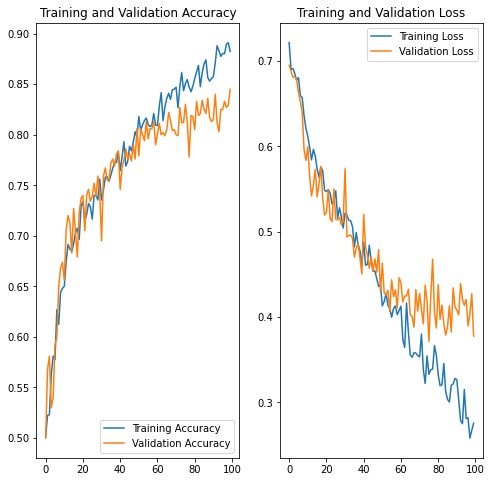

In [126]:
#visualizing our data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()